<div id="container" style="position:relative;">
<div style="float:left"><h1> Big Data Workflow With Google Books Ngrams </h1></div>  
      <div style="clear:both;"></div> 
<div style="float:left"><h2> Owner: Asli Keser </h2></div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# read csv directly from my s3 bucket and turn it into a dataframe
df_filtered_s3 = pd.read_csv('s3://ak-bstn-bucket/eng_1M_1gram_filtered_local.csv')

In [41]:
# show first 5 rows of the data
df_filtered_s3.head()

,token,year,frequency,pages,books
0,token,year,frequency,pages,books
1,data,1584,16,14,1
2,data,1614,3,2,1
3,data,1627,1,1,1
4,data,1631,22,18,1


In [42]:
# print out the shape of the df
print(f'There are {df_filtered_s3.shape[0]} rows and {df_filtered_s3.shape[1]} columns in the df.')

There are 317 rows and 5 columns in the df.


There is one redundant row in the beginning so let's drop that!

In [45]:
# drop the first row
df_filtered_s3.drop(inplace=True,labels=0)

In [46]:
# reset index
df_filtered_s3.reset_index(inplace=True, drop=True)

In [47]:
# show first 5 rows of the data
df_filtered_s3.head()

,token,year,frequency,pages,books
0,data,1584,16,14,1
1,data,1614,3,2,1
2,data,1627,1,1,1
3,data,1631,22,18,1
4,data,1637,1,1,1


Everything looks good!

7. Plot the number of occurrences of the token (the frequency column) of data over the years using matplotlib.

In [48]:
df_filtered_s3.groupby('year')['frequency'].sum()

year
1584        16
1614         3
1627         1
1631        22
1637         1
         ...  
2004    201841
2005    197467
2006    203669
2007    168338
2008    105331
Name: frequency, Length: 316, dtype: object

For every year we have one row of that in this filtered dataframe because even though I grouped by the data with year the row number did not change meaning every row had unique years. I just need yo sort the years to see the change in frequency over the years.

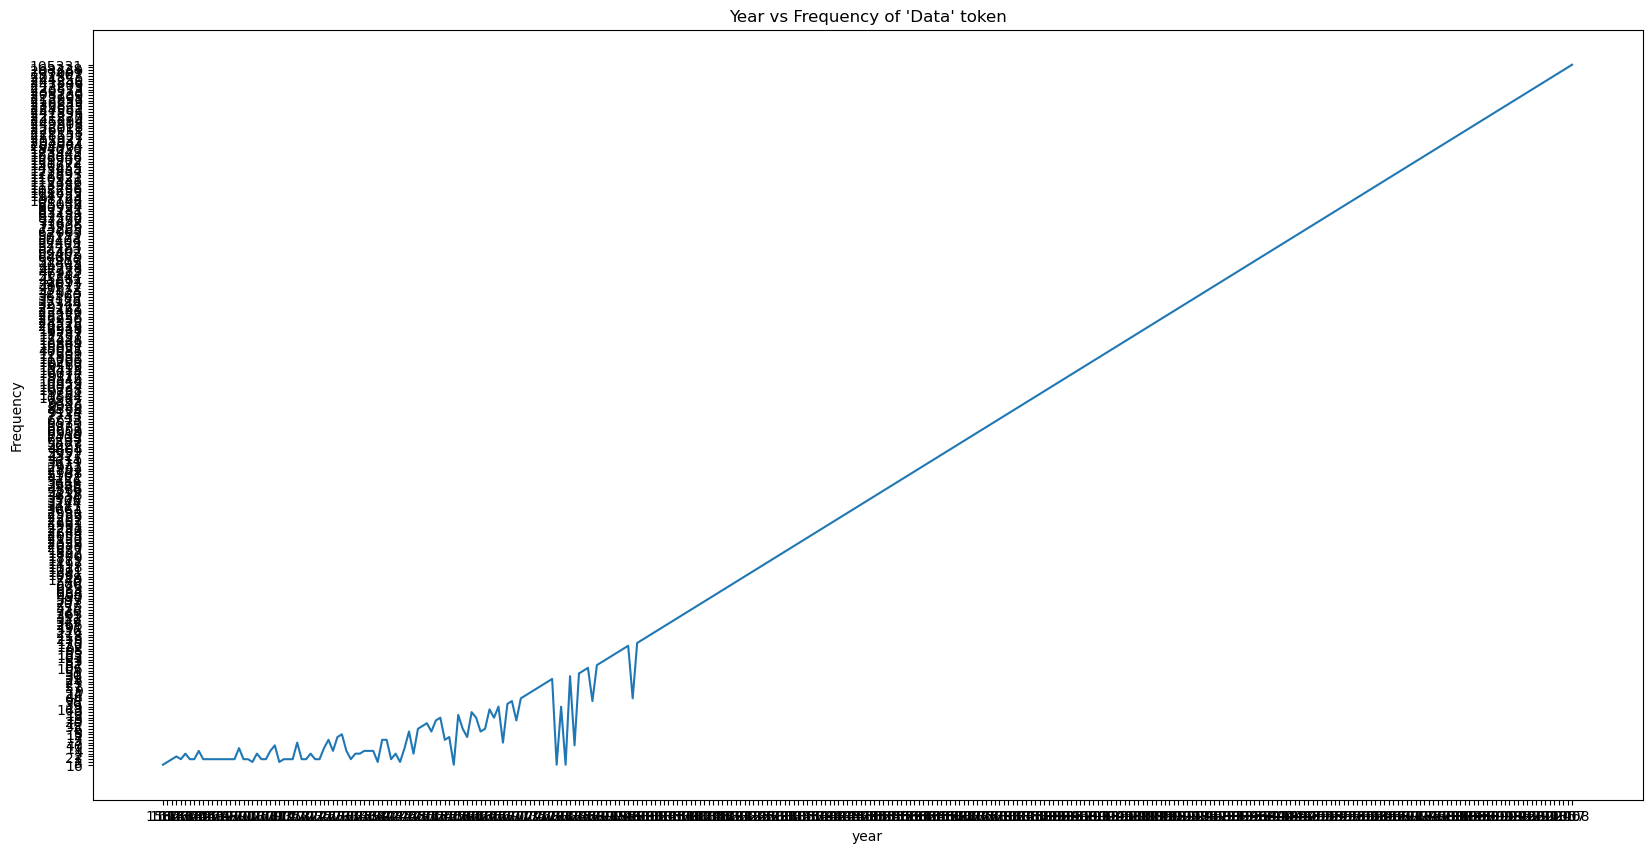

In [38]:
# plot a line chart of frequency over the years
plt.figure(figsize=(20,10))
plt.plot(df_filtered_s3['year'].sort_values(), df_filtered_s3['frequency'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Year vs Frequency of \'Data\' token')
plt.show()

### Appendix

In [ ]:
# Terminal
# connect to the head node of the cluster using SSH
ssh -i /Users/Work/Downloads/aws_cloud.pem -L 9995:localhost:9443 hadoop@ec2-3-237-34-92.compute-1.amazonaws.com
        
# make directory in the HDFS (Hadoop File System) named 'eng_1M_1gram'
# make sure you are in HDFS directory '/home/hadoop' 
mkdir eng_1M_1gram

# check if you created the directory or not
# you should be able to see 'eng_1M_1gram' in the '/home/hadoop' directory
ls 

# copy the data folder from the S3 bucket directly into a HDFS directory that you created
hadoop distcp s3://brainstation-dsft/eng_1M_1gram.csv /home/hadoop/eng_1M_1gram/eng_1M_1gram.csv
    
# check if you successfully put the file into HDFS directory or not
# you should be able to see the csv file 'eng_1M_1gram.csv' in the '/home/hadoop/eng_1M_1gram' directory
hadoop fs -ls /home/hadoop/eng_1M_1gram

# create a csv file for filtered data in pyspark with df.write.csv() -> see 'spark_nov2023.ipynb'

# add your filtered csv file to the same HDFS as your original file
sudo usermod -a -G hdfsadmingroup livy

# check if you successfully put the file into HDFS directory or not
# you should be able to see the two csv files 'eng_1M_1gram.csv' and 'eng_1M_1gram_filtered.csv' in the '/home/hadoop/eng_1M_1gram' directory
hadoop fs -ls /home/hadoop/eng_1M_1gram

# collect the contents of filtered data ('eng_1M_1gram_filtered.csv') into a single file on the local drive of the head node using getmerge
hadoop fs -getmerge /home/hadoop/eng_1M_1gram/eng_1M_1gram_filtered.csv eng_1M_1gram_filtered_local.csv

# check if you created the csv file or not
# you should be able to see the csv file 'eng_1M_1gram_filtered_local.csv' in the local drive of the head node
ls

# move this file ('eng_1M_1gram_filtered_local.csv') into a S3 bucket in your account.
# you should be able to see this file in your s3 bucket in aws
aws s3 cp eng_1M_1gram_filtered_local.csv s3://ak-bstn-bucket
